# SVR - Support Vector Regression
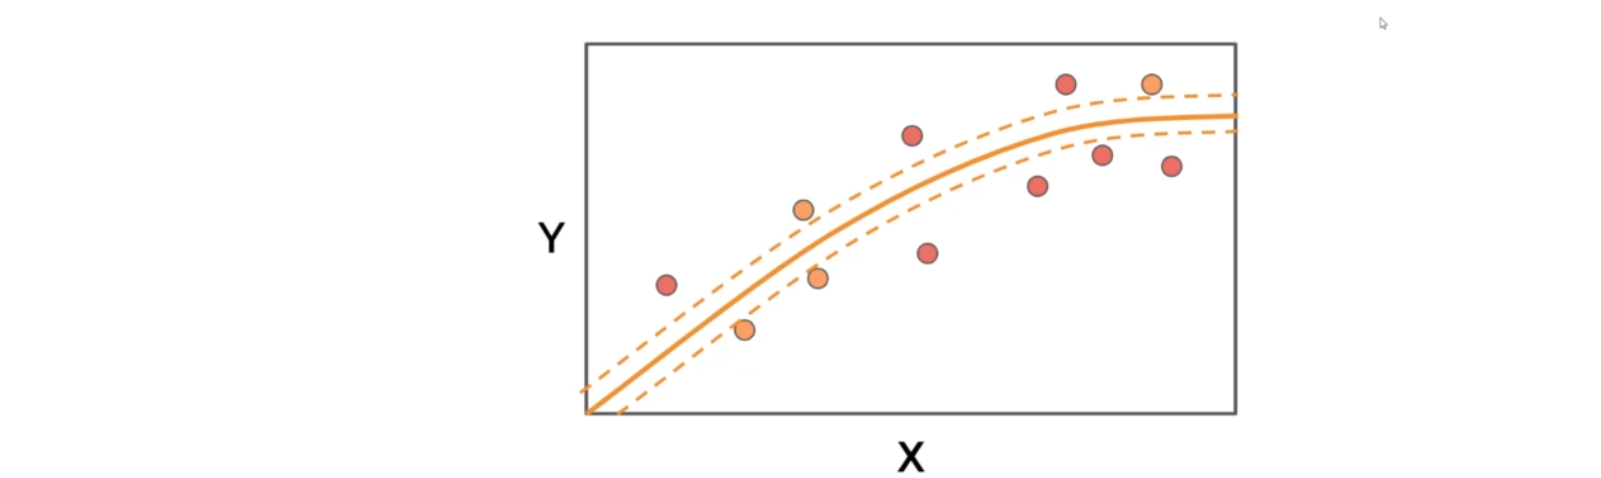

### Concrete Slump Test

*Abstract:* Concrete is a highly complex material. The slump flow of concrete is not 
only determined by the water content, but that is also influenced by other concrete 
ingredients.

---

- Data Set Characteristics: Multivariate
- Attribute Characteristics: Real
- Associated Tasks: Regression
- Number of Instances: 103
- Number of Attributes: 10
- Missing Values? N/A
- Area: Computer
- Date Donated: 2009-04-30

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv(r'./slump_test.csv')
df.head()

,Cement,Slag,Fly ash,Water,SP,Coarse Aggr.,Fine Aggr.,SLUMP(cm),FLOW(cm),Compressive Strength (28-day)(Mpa)
0,273.0,82.0,105.0,210.0,9.0,904.0,680.0,23.0,62.0,34.99
1,163.0,149.0,191.0,180.0,12.0,843.0,746.0,0.0,20.0,41.14
2,162.0,148.0,191.0,179.0,16.0,840.0,743.0,1.0,20.0,41.81
3,162.0,148.0,190.0,179.0,19.0,838.0,741.0,3.0,21.5,42.08
4,154.0,112.0,144.0,220.0,10.0,923.0,658.0,20.0,64.0,26.82


<Axes: >

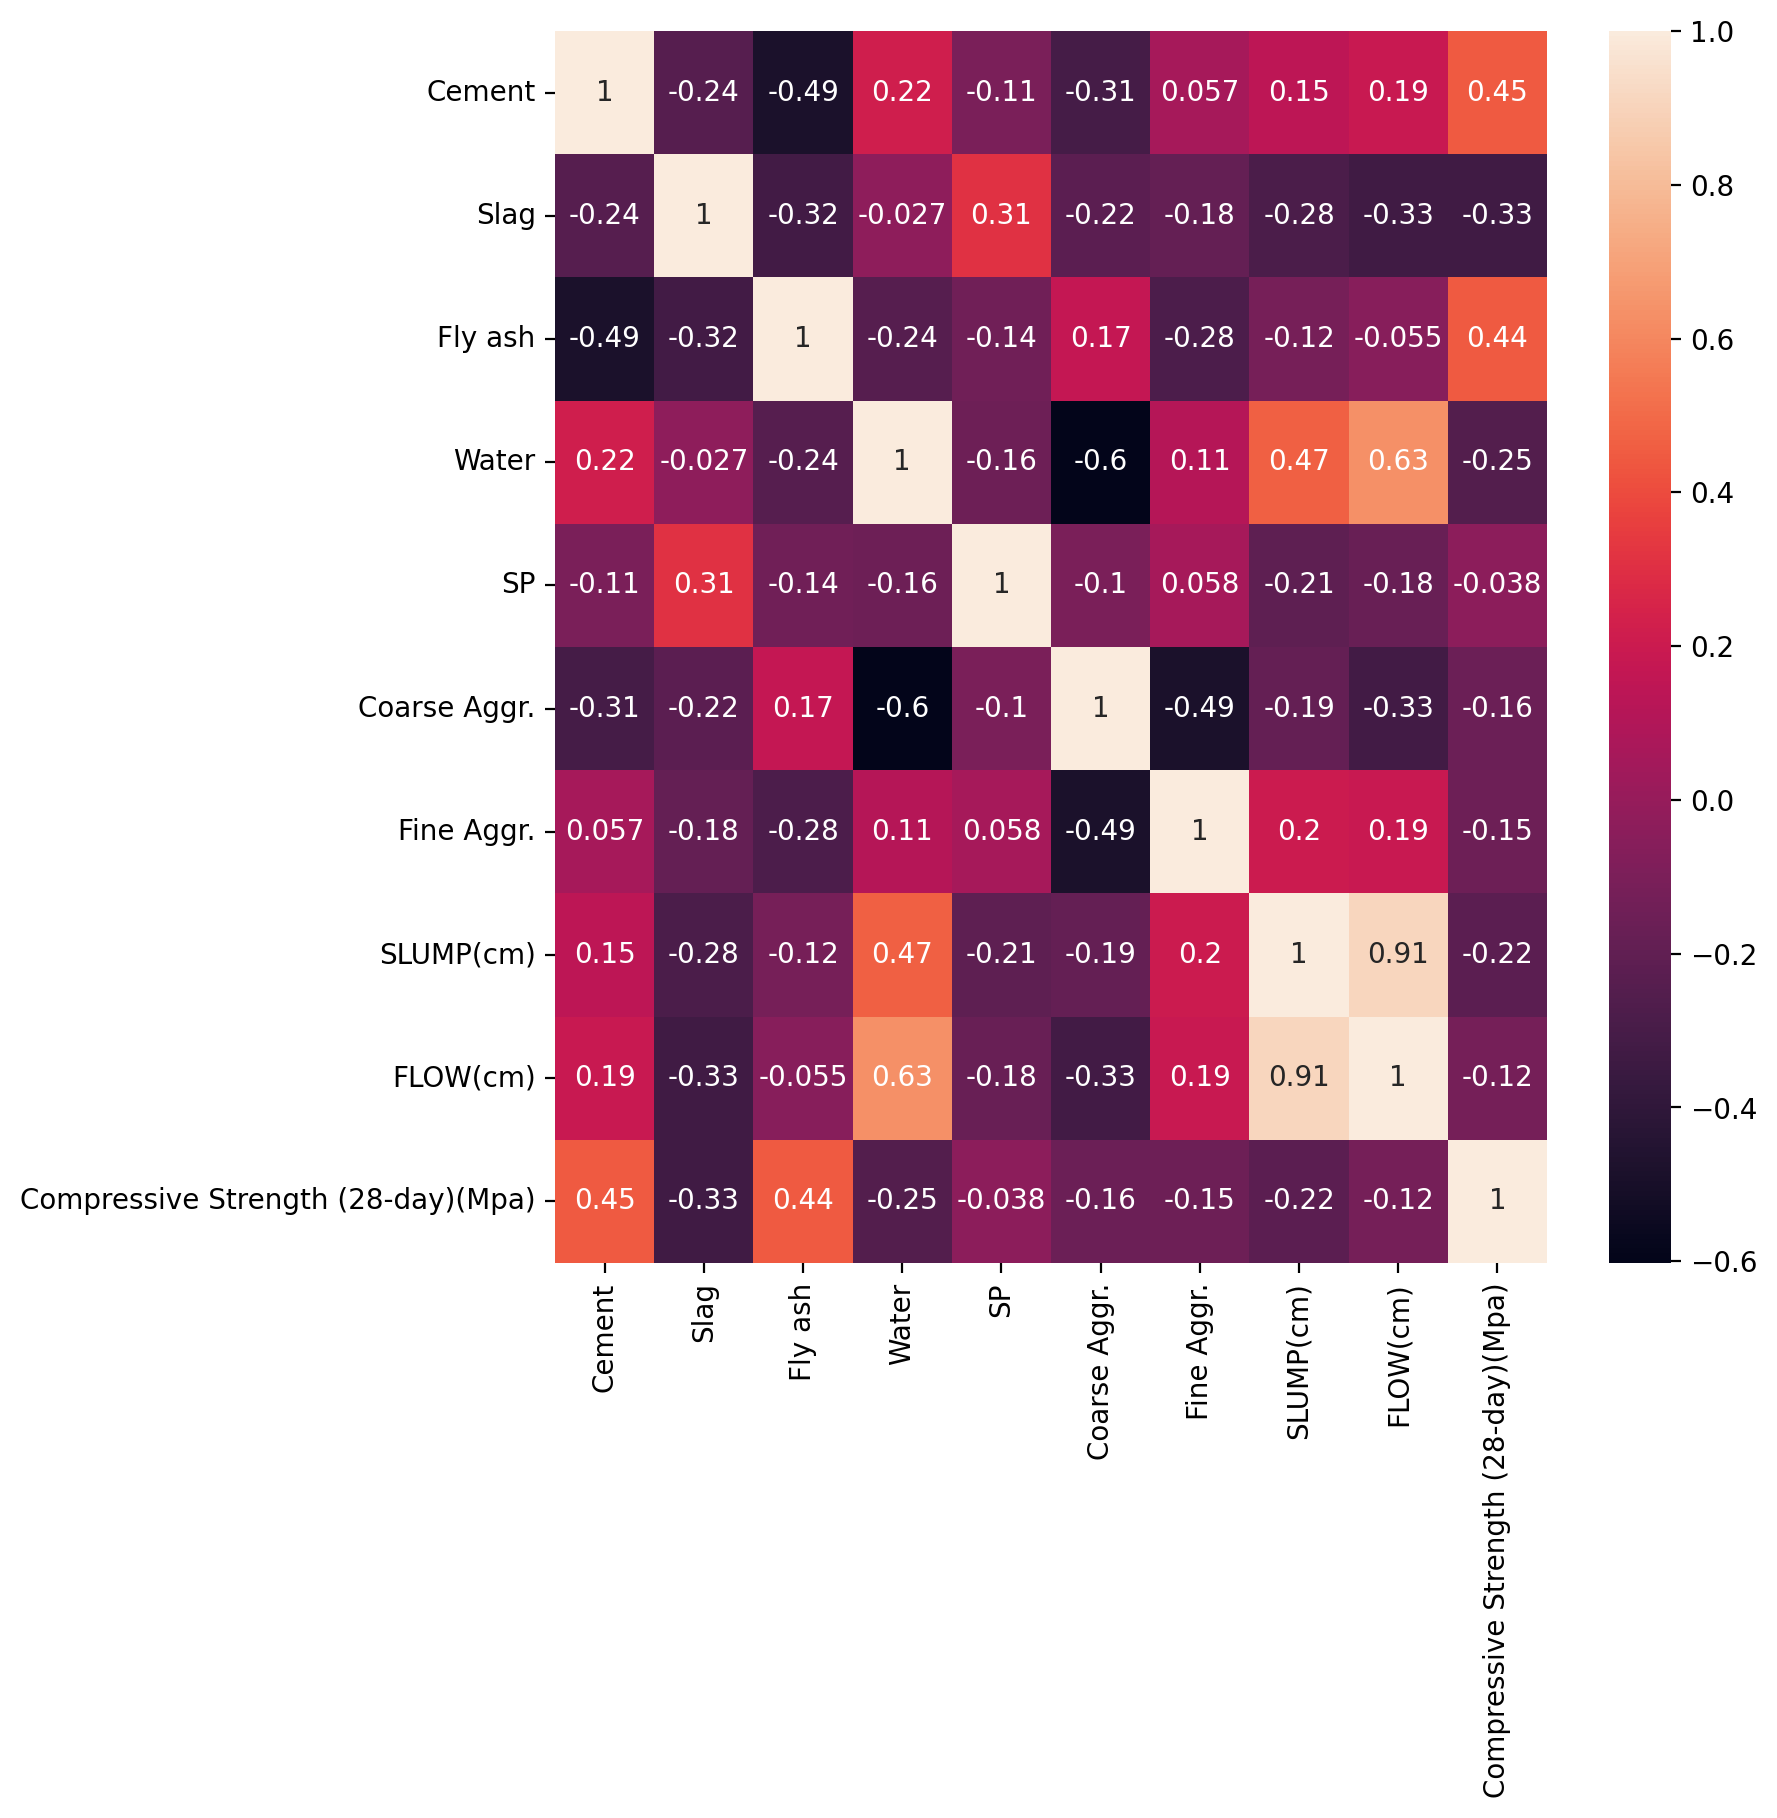

In [9]:
plt.figure(figsize=(8,8),dpi=200)
sns.heatmap(df.corr(), annot=True)

In [11]:
df.columns

Index(['Cement', 'Slag', 'Fly ash', 'Water', 'SP', 'Coarse Aggr.',
       'Fine Aggr.', 'SLUMP(cm)', 'FLOW(cm)',
       'Compressive Strength (28-day)(Mpa)'],
      dtype='object')

In [13]:
X = df.drop('Compressive Strength (28-day)(Mpa)', axis=1)
y = df['Compressive Strength (28-day)(Mpa)']

In [15]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=101)

In [18]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

scaled_X_train = scaler.fit_transform(X_train)
scaled_X_test = scaler.transform(X_test)

In [20]:
from sklearn.svm import SVR, LinearSVR

# If you know, kernel="linear" you will be using, then go and use LinearSVR,
# Mathematically it efficient and fast
# If you want to play around the different kernels then use SVR or SVC.
# help(SVR)

In [22]:
base_model = SVR()

In [24]:
base_model.fit(scaled_X_train,y_train)

SVR()

In [34]:
# Create base model with default parameters
base_pred = base_model.predict(scaled_X_test)

In [28]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

mean_absolute_error(y_test, base_pred)

5.236902091259179

In [30]:
np.sqrt(mean_squared_error(y_test, base_pred))

6.695914838327133

In [32]:
y_test.mean()

36.26870967741935

In [36]:
# Hyper Parameter tuning Using GridCV to find best parameters
param_grid = {'C':[0.001, 0.01, 0.1, 0.5, 1],
             'kernel':['linear','poly','rbf'],
             'gamma':['auto','scale'],
             'degree':[2,3,4],
             'epsilon':[0,0.01, 0.1, 0.5, 1, 2]}

In [38]:
from sklearn.model_selection import GridSearchCV

svr = SVR()

grid = GridSearchCV(svr,param_grid=param_grid)

In [40]:
grid.fit(scaled_X_train, y_train)

GridSearchCV(estimator=SVR(),
             param_grid={'C': [0.001, 0.01, 0.1, 0.5, 1], 'degree': [2, 3, 4],
                         'epsilon': [0, 0.01, 0.1, 0.5, 1, 2],
                         'gamma': ['auto', 'scale'],
                         'kernel': ['linear', 'poly', 'rbf']})

In [42]:
grid.best_params_

{'C': 1, 'degree': 2, 'epsilon': 2, 'gamma': 'auto', 'kernel': 'linear'}

In [44]:
grid_pred = grid.predict(scaled_X_test)

mean_absolute_error(y_test,grid_pred)

2.5126440265913828

In [46]:
np.sqrt(mean_squared_error(y_test,grid_pred))

3.1780851928123037